In [1]:
# Save models


In [2]:
import os, sys, re, time, gc, csv, random, scipy, pickle

Notebook_start = time.time()

from LIWC_Methods import Custom_Methods 
CM = Custom_Methods()

import pandas as pd
import numpy as np

from sklearn.metrics import *
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

from sklearn.svm import SVC, SVR
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression

# import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

from wordcloud import WordCloud

file_type = 'All'  # 'True','False','URL','Base', 'All'

In [3]:
# col_names = ['Section','Matrix_type','Preprocess','Scaled_Val''Algorithm','Accuracy','F1','TN','FP','FN','TP']
# result_df = pd.DataFrame(columns=col_names)

# for section in ['Body','Title']:
#     for matrix_type in ['TFIDF', 'BOW']:
#         for col_part in ['URL','Stem']:
#             print(f'Section: {section}, matrix_type: {matrix_type}, Preprocess: {col_part}')
#             folder_loc = f'dataset/Raw/LIWC/Stemmed_{file_type}/'
#             save_loc = f'{folder_loc}{col_part}/'
#             read_loc = f'{save_loc}{matrix_type}/'
            
#             # read dict:
#             loc = f'{folder_loc}Master_dicts/bodyDict_{col_part}.csv'
#             bodyDict = pd.read_csv(loc, header=None, dtype= {0:str}).set_index(0).squeeze().to_dict()
#             body_key_list = list(bodyDict.keys())
#             loc = f'{folder_loc}Master_dicts/titleDict_{col_part}.csv'
#             titleDict = pd.read_csv(loc, header=None, dtype= {0:str}).set_index(0).squeeze().to_dict()
#             title_key_list = list(titleDict)
            
#             # Get data 
#             data_cat = '_body'
#             files = [arg for arg in os.listdir(read_loc) if ((data_cat in arg) and ('User' not in arg))]
#             files.sort(key=CM.mySortFunc)
#             for num, file in enumerate(files):
#                 loc = open(f'{read_loc}{file}','rb')
#                 if num == 0:
#                     S_body = pickle.load(loc)
#                 else:
#                     S_body = scipy.sparse.vstack((S_body, pickle.load(loc)))
#                 loc.close()
#                 print('S_body.shape',S_body.shape)
            
#             data_cat = '_title'
#             files = [arg for arg in os.listdir(read_loc) if  ((data_cat in arg) and ('User' not in arg))]
#             files.sort(key=CM.mySortFunc)
#             for num, file in enumerate(files):
#                 # print([num,file])
#                 loc = open(f'{read_loc}{file}','rb')
#                 if num == 0:
#                     S_title = pickle.load(loc)
#                 else:
#                     S_title = scipy.sparse.vstack((S_title, pickle.load(loc)))
#                 loc.close()
#             # S_title.shape
            
#             data_cat = 'csv'
#             files = [arg for arg in os.listdir(read_loc) if ((data_cat in arg) and ('y' in arg) and ('Dict' not in arg) and ('User' not in arg))]
#             files.sort(key=CM.mySortFunc)
#             for num, file in enumerate(files):
#                 # print(num,end=',')
#                 if num == 0:
#                     y = np.genfromtxt(f'{read_loc}{file}',delimiter=',')
#                 else:
#                     temp = np.genfromtxt(f'{read_loc}{file}',delimiter=',')
#                     # print(temp.shape,end=',')
#                     y = np.concatenate((y, temp))
#             # print(y.shape)
#             print(f'Fake: {len(y[y==1])}, True: {len(y[y==0])}')
            
#             # Get sample same number of Fake and True rows
#             idx_fake= np.where(y==1)
#             min_cnt = min(len(y[y==0]),len(y[y==1]))
#             random.seed(42)
#             rand_fake_idx = random.sample(population=list(idx_fake[0]),k=min_cnt)
#             true_idx = np.where(y==0)
#             rand_true_idx = random.sample(population=list(true_idx[0]),k=min_cnt)
#             keep_idx = list(np.concatenate((rand_fake_idx,rand_true_idx)))
#             keep_idx_rmd = random.sample(population=keep_idx, k=len(keep_idx))           
#             body_sample = S_body[keep_idx_rmd]
#             title_sample = S_title[keep_idx_rmd]
#             y_sample = y[keep_idx_rmd]
#             print(f'Total: {len(y_sample)}, Fake: {len(y_sample[y_sample==1])}, True: {len(y_sample[y_sample==0])}')

#             # Build test and train datasets
#             if section ==  'Body':
#                 section_sample = body_sample
#             else:
#                 section_sample = title_sample
                
#             X_train, X_test, y_train, y_test = train_test_split(section_sample, y_sample, test_size=0.2, stratify=y_sample, random_state=42)

#             gc.collect()
#             print('log_regr')
#             # Build and Test Models
#             # model = LinearRegression()
#             log_regr = LogisticRegression()
#             # cross_val = round(np.mean(cross_val_score(log_regr, X_train, y_train, cv=4)),3)
            
#             log_regr.fit(X_train, y_train)
#             y_pred = log_regr.predict(X_test)
#             print("Statistical tests...")
#             print("***************")
#             a_score = round(accuracy_score(y_pred, y_test),3)
#             print(f'Accuracy score: {a_score}')
#             print("Confusion Matrix: ")
#             cm = confusion_matrix(y_pred, y_test)
#             print(cm)
            
#             result_df = result_df.append({'Section': section
#                             ,'Matrix_type': matrix_type
#                             ,'Preprocess': col_part
#                             ,'Algorithm': 'Logistic Regression'
#                             ,'Accuracy': a_score
#                             ,'F1': round(f1_score(y_pred, y_test),3)
#                             ,'TN':cm[0][0]
#                             ,'FP':cm[0][1]
#                             ,'FN':cm[1][0]
#                             ,'TP':cm[1][1]
#                             },ignore_index=True)
           
#             print('----------------------------------------')
#             trees = 100
#             gc.collect()
#             print('rf_clf')
#             rf_clf = RandomForestClassifier(n_estimators=trees)
#             # cross_val = round(np.mean(cross_val_score(rf_clf, X_train, y_train, cv=4)),3)
#             rf_clf.fit(X_train, y_train)
#             y_pred = rf_clf.predict(X_test)
#             print("Statistical tests...")
#             print("***************")
#             a_score = round(accuracy_score(y_pred, y_test),3)
#             print(f'Accuracy score: {a_score}')
#             print("Confusion Matrix: ")
#             cm = confusion_matrix(y_pred, y_test)
#             print(cm)
            
#             result_df = result_df.append({'Section': section
#                             ,'Matrix_type': matrix_type
#                             ,'Preprocess': col_part
#                             ,'Algorithm': 'Random Forest Classifier'
#                             ,'Accuracy': a_score
#                             ,'F1': round(f1_score(y_pred, y_test),3)
#                             ,'TN':cm[0][0]
#                             ,'FP':cm[0][1]
#                             ,'FN':cm[1][0]
#                             ,'TP':cm[1][1]
#                             },ignore_index=True)
            
#             print('----------------------------------------')
#             gc.collect()
#             print('svc_clf')
#             svc_clf = SVC(gamma ='scale', probability=True, kernel = 'linear')
#             # cross_val = round(np.mean(cross_val_score(svc_clf, X_train, y_train, cv=4)),3)
#             svc_clf.fit(X_train, y_train)
#             y_pred = svc_clf.predict(X_test)
#             print("Statistical tests...")
#             print("***************")
#             a_score = round(accuracy_score(y_pred, y_test),3)
#             print(f'Accuracy score: {a_score}')
#             print("Confusion Matrix: ")
#             cm = confusion_matrix(y_pred, y_test)
#             print(cm)
            
#             result_df = result_df.append({'Section': section
#                             ,'Matrix_type': matrix_type
#                             ,'Preprocess': col_part
#                             ,'Algorithm': 'Support Vector Classifier'
#                             ,'Accuracy': a_score
#                             ,'F1': round(f1_score(y_pred, y_test),3)
#                             ,'TN':cm[0][0]
#                             ,'FP':cm[0][1]
#                             ,'FN':cm[1][0]
#                             ,'TP':cm[1][1]
#                             },ignore_index=True)
            
#             print('----------------------------------------')
#             gc.collect()
#             print('mlp_clf')
#             mlp_clf = MLPClassifier(hidden_layer_sizes=(128,64,32,16,8),max_iter=2500)
#             # cross_val = round(np.mean(cross_val_score(mlp_clf, X_train, y_train, cv=4)),3)
#             mlp_clf.fit(X_train, y_train)
#             y_pred = mlp_clf.predict(X_test)
#             print("Statistical tests...")
#             print("***************")
#             a_score = round(accuracy_score(y_pred, y_test),3)
#             print(f'Accuracy score: {a_score}')
#             print("Confusion Matrix: ")
#             cm = confusion_matrix(y_pred, y_test)
#             print(cm)
            
#             result_df = result_df.append({'Section': section
#                             ,'Matrix_type': matrix_type
#                             ,'Preprocess': col_part
#                             ,'Algorithm': 'MLP Classifier'
#                             ,'Accuracy': a_score
#                             ,'F1': round(f1_score(y_pred, y_test),3)
#                             ,'TN':cm[0][0]
#                             ,'FP':cm[0][1]
#                             ,'FN':cm[1][0]
#                             ,'TP':cm[1][1]
#                             },ignore_index=True)

#             print('')
#             print('########################################################################')
            
# print('-----------------------')
# print('Done')
# print('-----------------------')
# # result_df.to_csv(f'{folder_loc}TFIDF_result_df.csv',mode='w', header=True, index=False)
# # result_df           
            

In [4]:
print('Done')

Done


In [5]:
gc.collect()
for section in ['Body']:
    for matrix_type in ['BOW']:
        for col_part in ['URL']:
            print(f'Section: {section}, matrix_type: {matrix_type}, Preprocess: {col_part}')
            folder_loc = f'dataset/Raw/LIWC/Stemmed_{file_type}/'
            save_loc = f'{folder_loc}{col_part}/'
            read_loc = f'{save_loc}{matrix_type}/'
            
            # read dict:
            loc = f'{folder_loc}Master_dicts/bodyDict_{col_part}.csv'
            bodyDict = pd.read_csv(loc, header=None, dtype= {0:str}).set_index(0).squeeze().to_dict()
            body_key_list = list(bodyDict.keys())
            loc = f'{folder_loc}Master_dicts/titleDict_{col_part}.csv'
            titleDict = pd.read_csv(loc, header=None, dtype= {0:str}).set_index(0).squeeze().to_dict()
            title_key_list = list(titleDict)
            
            # Get data 
            data_cat = '_body'
            files = [arg for arg in os.listdir(read_loc) if ((data_cat in arg) and ('User' not in arg))]
            files.sort(key=CM.mySortFunc)
            for num, file in enumerate(files):
                loc = open(f'{read_loc}{file}','rb')
                if num == 0:
                    S_body = pickle.load(loc)
                else:
                    S_body = scipy.sparse.vstack((S_body, pickle.load(loc)))
                loc.close()
                # print('S_body.shape',S_body.shape)
            
            data_cat = '_title'
            files = [arg for arg in os.listdir(read_loc) if  ((data_cat in arg) and ('User' not in arg))]
            files.sort(key=CM.mySortFunc)
            for num, file in enumerate(files):
                # print([num,file])
                loc = open(f'{read_loc}{file}','rb')
                if num == 0:
                    S_title = pickle.load(loc)
                else:
                    S_title = scipy.sparse.vstack((S_title, pickle.load(loc)))
                loc.close()
            # S_title.shape
            
            data_cat = 'csv'
            files = [arg for arg in os.listdir(read_loc) if ((data_cat in arg) and ('y' in arg) and ('Dict' not in arg) and ('User' not in arg))]
            files.sort(key=CM.mySortFunc)
            for num, file in enumerate(files):
                # print(num,end=',')
                if num == 0:
                    y = np.genfromtxt(f'{read_loc}{file}',delimiter=',')
                else:
                    temp = np.genfromtxt(f'{read_loc}{file}',delimiter=',')
                    # print(temp.shape,end=',')
                    y = np.concatenate((y, temp))
            # print(y.shape)
            print(f'Fake: {len(y[y==1])}, True: {len(y[y==0])}')
            
            # Get sample same number of Fake and True rows
            idx_fake= np.where(y==1)
            min_cnt = min(len(y[y==0]),len(y[y==1]))
            random.seed(42)
            rand_fake_idx = random.sample(population=list(idx_fake[0]),k=min_cnt)
            true_idx = np.where(y==0)
            rand_true_idx = random.sample(population=list(true_idx[0]),k=min_cnt)
            keep_idx = list(np.concatenate((rand_fake_idx,rand_true_idx)))
            keep_idx_rmd = random.sample(population=keep_idx, k=len(keep_idx))           
            body_sample = S_body[keep_idx_rmd]
            title_sample = S_title[keep_idx_rmd]
            y_sample = y[keep_idx_rmd]
            print(f'Total: {len(y_sample)}, Fake: {len(y_sample[y_sample==1])}, True: {len(y_sample[y_sample==0])}')

            # Build test and train datasets
            if section ==  'Body':
                section_sample = body_sample
            else:
                section_sample = title_sample
                
            X_train, X_test, y_train, y_test = train_test_split(section_sample, y_sample, test_size=0.2, stratify=y_sample, random_state=42)

            gc.collect()
            print('log_regr')
            # Build and Test Models
            # model = LinearRegression()
            log_regr = LogisticRegression()
            # cross_val = round(np.mean(cross_val_score(log_regr, X_train, y_train, cv=4)),3)
            
            log_regr.fit(X_train, y_train)
            y_pred = log_regr.predict(X_test)
            
            print("Statistical tests...")
            print("***************")
            a_score = round(accuracy_score(y_pred, y_test),3)
            print(f'Accuracy score: {a_score}')
            print("Confusion Matrix: ")
            cm = confusion_matrix(y_pred, y_test)
            print(cm)

# save the model to disk
filename = f'{folder_loc}TFIDF_body_model.pkl'
print(filename)
pickle.dump(log_regr, open(filename, 'wb'))

Section: Body, matrix_type: BOW, Preprocess: URL
Fake: 11077, True: 12045
Total: 22154, Fake: 11077, True: 11077
log_regr
Statistical tests...
***************
Accuracy score: 0.964
Confusion Matrix: 
[[2128   73]
 [  88 2142]]
dataset/Raw/LIWC/Stemmed_All/TFIDF_body_model.pkl


In [6]:
len(bodyDict.keys())

95987

In [7]:
importances = log_regr.coef_[0]
len(importances)

95987

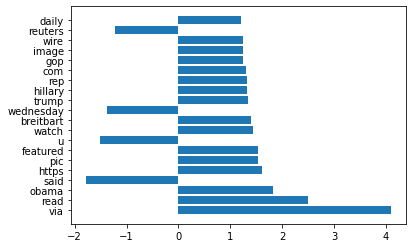

In [8]:
imp,names = CM.f_importances(importances, bodyDict.keys(),top=20)

In [9]:
print(section_sample.shape)
matrix = section_sample.todense()

(22154, 95987)


In [10]:
key_list = list(bodyDict.keys())
len(key_list)

95987

In [11]:
df = pd.DataFrame(matrix, columns=key_list)
df

,pro,gun,crowd,loves,guns,first,respect,last,least,seems,...,sooka,equatorias,musila,paulino,wanawilla,unango,zab,khormato,masud,shukur
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22149,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22150,1,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
22151,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22152,0,1,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
true_idx = [idx for idx,val in enumerate(y_sample) if val == 0]
fake_idx = [idx for idx,val in enumerate(y_sample) if val == 1]
print(len(true_idx),len(fake_idx))

11077 11077


In [13]:
# Most frequent words in true news
big_t = df.iloc[true_idx].sum(axis=0)
big_t

pro         666
gun         232
crowd       274
loves        27
guns        143
           ... 
unango        1
zab           1
khormato      1
masud         1
shukur        1
Length: 95987, dtype: int64

In [14]:
# Most frequent words in fake news
big_f = df.iloc[fake_idx].sum(axis=0)
big_f
# big_fake.sort_values(axis=0, ascending=False, inplace=True)
# big_fake

pro         551
gun         660
crowd       569
loves       204
guns        353
           ... 
unango        0
zab           0
khormato      0
masud         0
shukur        0
Length: 95987, dtype: int64

In [15]:
big_fake = big_f.subtract(big_t)
min_ = min(big_fake)
max_ = max(big_fake)
range_ = max_ - min_
big_fake = big_fake / range_ * 15
big_fake.sort_values(axis=0, ascending=False, inplace=True)
big_fake[:20]

via         8.026643
image       6.468729
featured    6.246895
like        4.832919
com         4.123391
even        3.867690
know        3.525627
watch       3.373222
fact        3.329194
video       3.171709
america     3.049786
twitter     3.019305
getty       2.917702
us          2.899074
https       2.892301
get         2.829646
one         2.797471
pic         2.662000
images      2.628133
right       2.624746
dtype: float64

In [16]:
folder_loc

'dataset/Raw/LIWC/Stemmed_All/'

In [17]:
# Most frequent words in true news
big_true = big_fake.sort_values(axis=0, ascending=True, inplace=False) * -1
big_true[:250]

u             6.973357
said          6.329871
reuters       4.045496
minister      3.530707
government    3.369835
                ...   
french        0.602845
bank          0.602845
industry      0.601152
role          0.601152
seek          0.599458
Length: 250, dtype: float64

In [18]:
word_dict = {}
for name in big_true.index[:500]:
    word_dict[name] = round(big_true[name],3)
# Save LIWC_Feature_dict
loc = f'{folder_loc}Body_true_word_dict.csv'
print(loc)
with open(loc, 'w') as f:
    f.write("%s,%s\n"%('key','true_word'))
    for key in word_dict.keys():
        f.write("%s,%s\n"%(key,word_dict[key]))

n_items = [[k,word_dict[k]] for k in list(word_dict.keys())[:10]]
n_items

dataset/Raw/LIWC/Stemmed_All/Body_true_word_dict.csv


[['u', 6.973],
 ['said', 6.33],
 ['reuters', 4.045],
 ['minister', 3.531],
 ['government', 3.37],
 ['wednesday', 3.057],
 ['tuesday', 2.914],
 ['told', 2.911],
 ['thursday', 2.867],
 ['year', 2.698]]

In [19]:
word_dict = {}
for name in big_fake.index[:500]:
    word_dict[name] = round(big_fake[name],3)
# Save LIWC_Feature_dict
loc = f'{folder_loc}Body_fake_word_dict.csv'
print(loc)
with open(loc, 'w') as f:
    f.write("%s,%s\n"%('key','fake_word'))
    for key in word_dict.keys():
        f.write("%s,%s\n"%(key,word_dict[key]))

n_items = [[k,word_dict[k]] for k in list(word_dict.keys())[:10]]
n_items

dataset/Raw/LIWC/Stemmed_All/Body_fake_word_dict.csv


[['via', 8.027],
 ['image', 6.469],
 ['featured', 6.247],
 ['like', 4.833],
 ['com', 4.123],
 ['even', 3.868],
 ['know', 3.526],
 ['watch', 3.373],
 ['fact', 3.329],
 ['video', 3.172]]

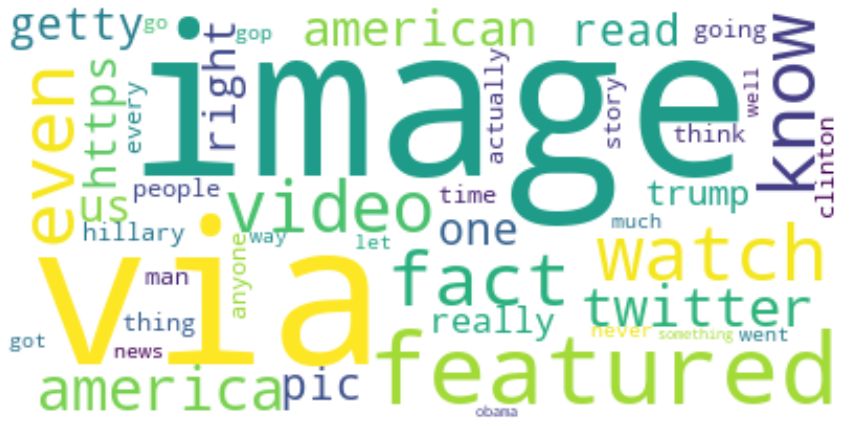

In [20]:
big_fake_list = [int(big_fake[idx]+1) * str(idx +' ') for idx in big_fake[:50].index]
text = ' '.join(big_fake_list)
wordcloud = WordCloud(max_font_size=100, max_words=1000, collocations=False, background_color="white").generate(text)
plt.figure(figsize=[15,15])
# plt.title('Wordcloud of Word More Likely to be in the Body of Fake News Articles', fontsize=25, pad=20)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

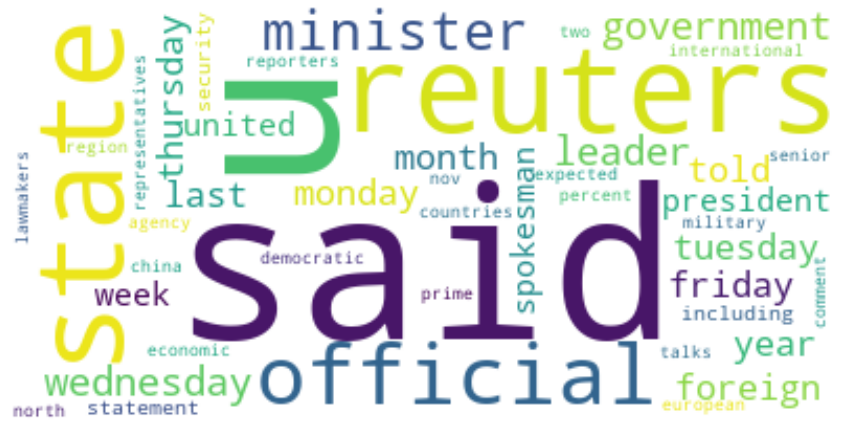

In [21]:
big_true_list = [int(big_true[idx]+1) * str(idx +' ') for idx in big_true[:50].index]
text = ' '.join(big_true_list)
wordcloud = WordCloud(max_font_size=100, max_words=1000, collocations=False, background_color="white").generate(text)
plt.figure(figsize=[15,15])
# plt.title('Wordcloud of Word More Likely to be in the Body of Real News Articles', fontsize=25, pad=20)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [22]:
gc.collect()
for section in ['Title']:
    for matrix_type in ['TFIDF']:
        for col_part in ['URL']:
            print(f'Section: {section}, matrix_type: {matrix_type}, Preprocess: {col_part}')
            folder_loc = f'dataset/Raw/LIWC/Stemmed_{file_type}/'
            save_loc = f'{folder_loc}{col_part}/'
            read_loc = f'{save_loc}{matrix_type}/'
            
            # read dict:
            loc = f'{folder_loc}Master_dicts/bodyDict_{col_part}.csv'
            bodyDict = pd.read_csv(loc, header=None, dtype= {0:str}).set_index(0).squeeze().to_dict()
            body_key_list = list(bodyDict.keys())
            loc = f'{folder_loc}Master_dicts/titleDict_{col_part}.csv'
            titleDict = pd.read_csv(loc, header=None, dtype= {0:str}).set_index(0).squeeze().to_dict()
            title_key_list = list(titleDict)
            
            # Get data 
            data_cat = '_body'
            files = [arg for arg in os.listdir(read_loc) if data_cat in arg]
            files.sort(key=CM.mySortFunc)
            for num, file in enumerate(files):
                loc = open(f'{read_loc}{file}','rb')
                if num == 0:
                    S_body = pickle.load(loc)
                else:
                    S_body = scipy.sparse.vstack((S_body, pickle.load(loc)))
                loc.close()
            # S_body.shape
            
            data_cat = '_title'
            files = [arg for arg in os.listdir(read_loc) if data_cat in arg]
            files.sort(key=CM.mySortFunc)
            for num, file in enumerate(files):
                # print([num,file])
                loc = open(f'{read_loc}{file}','rb')
                if num == 0:
                    S_title = pickle.load(loc)
                else:
                    S_title = scipy.sparse.vstack((S_title, pickle.load(loc)))
                loc.close()
            # S_title.shape
            
            data_cat = 'csv'
            files = [arg for arg in os.listdir(read_loc) if ((data_cat in arg) and ('y' in arg) and ('Dict' not in arg) and ('User' not in arg))]
            files.sort(key=CM.mySortFunc)
            for num, file in enumerate(files):
                # print(num,end=',')
                if num == 0:
                    y = np.genfromtxt(f'{read_loc}{file}',delimiter=',')
                else:
                    temp = np.genfromtxt(f'{read_loc}{file}',delimiter=',')
                    # print(temp.shape,end=',')
                    y = np.concatenate((y, temp))
            # print(y.shape)
            print(f'Fake: {len(y[y==1])}, True: {len(y[y==0])}')
            
            # Get sample same number of Fake and True rows
            idx_fake= np.where(y==1)
            min_cnt = min(len(y[y==0]),len(y[y==1]))
            random.seed(42)
            rand_fake_idx = random.sample(population=list(idx_fake[0]),k=min_cnt)
            true_idx = np.where(y==0)
            rand_true_idx = random.sample(population=list(true_idx[0]),k=min_cnt)
            keep_idx = list(np.concatenate((rand_fake_idx,rand_true_idx)))
            keep_idx_rmd = random.sample(population=keep_idx, k=len(keep_idx))           
            body_sample = S_body[keep_idx_rmd]
            title_sample = S_title[keep_idx_rmd]
            y_sample = y[keep_idx_rmd]
            
            print(f'Total: {len(y_sample)}, Fake: {len(y_sample[y_sample==1])}, True: {len(y_sample[y_sample==0])}')

            # Build test and train datasets
            if section ==  'Body':
                section_sample = body_sample
            else:
                section_sample = title_sample
                
            X_train, X_test, y_train, y_test = train_test_split(section_sample, y_sample, test_size=0.2, stratify=y_sample, random_state=42)

             
            trees = 100
            gc.collect()
            print('rf_clf')
            rf_clf = RandomForestClassifier(n_estimators=trees)
            # cross_val = round(np.mean(cross_val_score(rf_clf, X_train, y_train, cv=4)),3)
            rf_clf.fit(X_train, y_train)
            y_pred = rf_clf.predict(X_test)
            print("Statistical tests...")
            print("***************")
            a_score = round(accuracy_score(y_pred, y_test),3)
            print(f'Accuracy score: {a_score}')
            print("Confusion Matrix: ")
            cm = confusion_matrix(y_pred, y_test)
            print(cm)
# save the model to disk
filename = f'{folder_loc}TFIDF_title_model.pkl'
print(filename)
pickle.dump(rf_clf, open(filename, 'wb'))

Section: Title, matrix_type: TFIDF, Preprocess: URL
Fake: 10982, True: 11964
Total: 21964, Fake: 10982, True: 10982
rf_clf
Statistical tests...
***************
Accuracy score: 0.922
Confusion Matrix: 
[[2067  212]
 [ 130 1984]]
dataset/Raw/LIWC/Stemmed_All/TFIDF_title_model.pkl


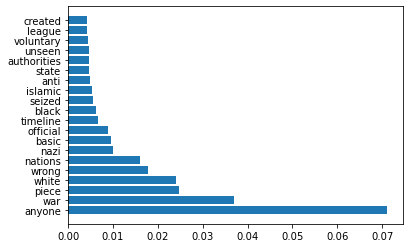

In [23]:
importances = rf_clf.feature_importances_
imp,names = CM.f_importances(importances, bodyDict.keys(),top=20)

In [24]:
matrix = section_sample.todense()
key_list = list(titleDict.keys())
df = pd.DataFrame(matrix, columns=key_list)
df

,sickening,pro,gun,meme,quite,possibly,vile,thing,internet,image,...,calculator,defaced,writeoff,restarted,refining,artificially,unacceptably,limiting,averts,outlander
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.442542,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21960,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21962,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
true_idx = [idx for idx,val in enumerate(y_sample) if val == 0]
fake_idx = [idx for idx,val in enumerate(y_sample) if val == 1]
print(len(true_idx),len(fake_idx))

10982 10982


In [26]:
# Most frequent words in true news
big_t = df.iloc[true_idx].sum(axis=0)
big_t

sickening        0.000000
pro             18.432806
gun             42.378969
meme             0.000000
quite            1.166700
                  ...    
artificially     0.000000
unacceptably     0.663812
limiting         0.000000
averts           1.327625
outlander        0.885083
Length: 17323, dtype: float64

In [27]:
# Most frequent words in fake news
big_f = df.iloc[fake_idx].sum(axis=0)
big_f
# big_fake.sort_values(axis=0, ascending=False, inplace=True)
# big_fake

sickening         8.307250
pro              50.890021
gun             100.275487
meme              6.470040
quite             1.526768
                   ...    
artificially      0.531050
unacceptably      0.000000
limiting          0.000000
averts            0.000000
outlander         0.000000
Length: 17323, dtype: float64

In [28]:
big_fake = big_f.subtract(big_t)
min_ = min(big_fake)
max_ = max(big_fake)
range_ = max_ - min_
big_fake = big_fake / range_ * 15
big_fake.sort_values(axis=0, ascending=False, inplace=True)
big_fake[:20]

video       8.668755
hillary     2.348785
watch       2.105749
trump       1.731467
obama       1.387208
breaking    1.141887
donald      0.977753
gop         0.964502
black       0.794197
news        0.717222
america     0.614868
muslim      0.586011
tweets      0.580403
us          0.547658
racist      0.531388
gets        0.524571
one         0.507135
fox         0.459870
liberal     0.448655
bernie      0.430561
dtype: float64

In [29]:
# Most frequent words in true news
big_true = big_fake.sort_values(axis=0, ascending=True, inplace=False) * -1
big_true[:250]

u           6.331245
says        4.112329
house       1.835178
page        1.393514
north       1.301135
              ...   
four        0.129941
pentagon    0.129345
cup         0.129247
dispute     0.128685
hariri      0.128270
Length: 250, dtype: float64

In [30]:
word_dict = {}
for name in big_true.index[:500]:
    word_dict[name] = round(big_true[name],3)
# Save LIWC_Feature_dict
loc = f'{folder_loc}Title_true_word_dict.csv'
print(loc)
with open(loc, 'w') as f:
    f.write("%s,%s\n"%('key','true_word'))
    for key in word_dict.keys():
        f.write("%s,%s\n"%(key,word_dict[key]))

n_items = [[k,word_dict[k]] for k in list(word_dict.keys())[:10]]
n_items

dataset/Raw/LIWC/Stemmed_All/Title_true_word_dict.csv


[['u', 6.331],
 ['says', 4.112],
 ['house', 1.835],
 ['page', 1.394],
 ['north', 1.301],
 ['korea', 1.264],
 ['china', 1.218],
 ['russia', 1.107],
 ['senate', 1.063],
 ['tax', 0.916]]

In [31]:
word_dict = {}
for name in big_fake.index[:500]:
    word_dict[name] = round(big_fake[name],3)
# Save LIWC_Feature_dict
loc = f'{folder_loc}Title_fake_word_dict.csv'
print(loc)
with open(loc, 'w') as f:
    f.write("%s,%s\n"%('key','fake_word'))
    for key in word_dict.keys():
        f.write("%s,%s\n"%(key,word_dict[key]))

n_items = [[k,word_dict[k]] for k in list(word_dict.keys())[:10]]
n_items

dataset/Raw/LIWC/Stemmed_All/Title_fake_word_dict.csv


[['video', 8.669],
 ['hillary', 2.349],
 ['watch', 2.106],
 ['trump', 1.731],
 ['obama', 1.387],
 ['breaking', 1.142],
 ['donald', 0.978],
 ['gop', 0.965],
 ['black', 0.794],
 ['news', 0.717]]

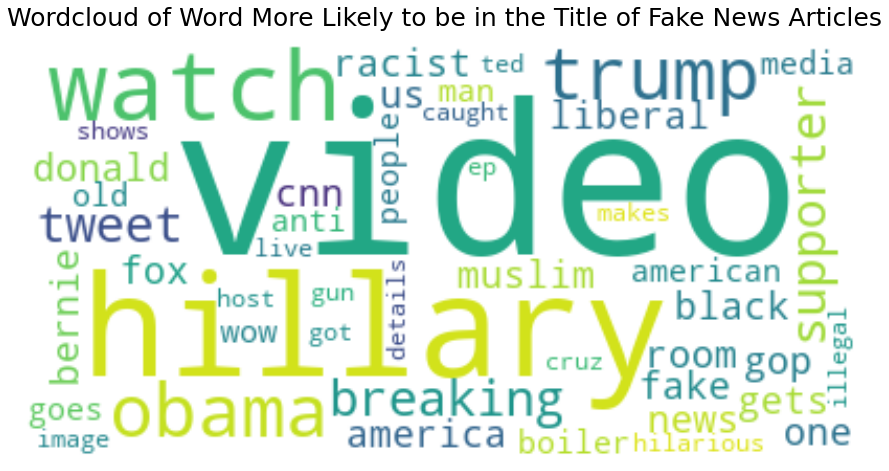

In [32]:
big_fake_list = [int(big_fake[idx] +1) * str(idx +' ') for idx in big_fake[:50].index]
text = ' '.join(big_fake_list)
wordcloud = WordCloud(max_font_size=100, max_words=1000, collocations=False, background_color="white").generate(text)
plt.figure(figsize=[15,15])
plt.title('Wordcloud of Word More Likely to be in the Title of Fake News Articles', fontsize=25, pad=20)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

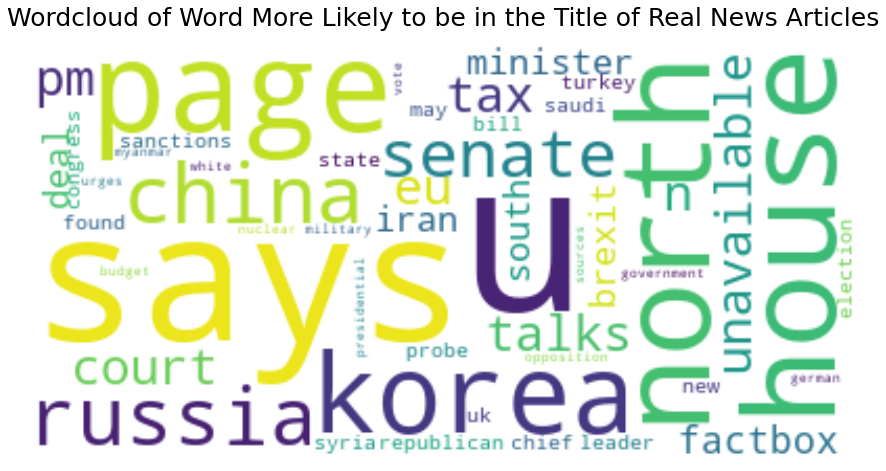

In [33]:
big_true_list = [int(big_true[idx]+1) * str(idx +' ') for idx in big_true[:50].index]
text = ' '.join(big_true_list)
wordcloud = WordCloud(max_font_size=100, max_words=1000, collocations=False, background_color="white").generate(text)
plt.figure(figsize=[15,15])
plt.title('Wordcloud of Word More Likely to be in the Title of Real News Articles', fontsize=25, pad=20)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
Notebook_end = time.time()
Total_Notebook_Time = round((Notebook_end - Notebook_start)/60.0,)
print(f'This notebook took {Total_Notebook_Time} min to run.')